In [24]:
import numpy as np
import astropy
from astropy.io import ascii
from astropy.io import fits
from astropy.coordinates import SkyCoord
from astropy import units as u
from astropy.table import Table
from astropy.table import Table, Column
import pylab
from pylab import plot
from astropy.cosmology import WMAP9 as cosmo
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib_venn import venn2
from matplotlib_venn import venn3, venn3_circles
%matplotlib inline
%config InlineBackend.figure_format='svg'
%config InlineBackend.figure_format='retina'

In [129]:
print("\033[43;30mLendo os catalogos\033[m")
w = ascii.read('wen.csv') 
r = fits.open('redmapper.fits') 
r = r[1].data
k = Table.read('koester2007.vot', format='votable')
print 'Wen:',len(w)
print 'Rykoff:',len(r)
print 'Koester:', len(k) 

Lendo os catalogos
Wen: 132684
Rykoff: 26111
Koester: 13823


In [130]:
print("\033[43;30mValores de Ra, Dec e z de cada catalogo\033[m")
c_w = SkyCoord(ra = w['RAJ2000']*u.degree, dec = w['DEJ2000']*u.deg, distance = cosmo.comoving_distance(w['zph'])) 
c_r = SkyCoord(ra = r['RA']*u.deg, dec = r['DEC']*u.deg, distance = cosmo.comoving_distance(r['Z_LAMBDA']))
c_k = SkyCoord(ra = k['RAJ2000'], dec = k['DEJ2000'], distance = cosmo.comoving_distance(k['zph'])) 

Valores de Ra, Dec e z de cada catalogo


# Match do Wen com o Rykoff

In [131]:
print 'match to catalog 3d'
idwr, d2dw, d3dw = c_w.match_to_catalog_3d(c_r) 
print 'Match Wen em relacao ao Redmapper =',len(idwr)
print idwr, d2dw, d3dw 

print 'match to catalog 3d'
idrw, d2dr, d3dr = c_r.match_to_catalog_3d(c_w) 
print 'Match Wen em relacao ao Redmapper =',len(idrw)
print idrw, d2dr, d3dr

match to catalog 3d
Match Wen em relacao ao Redmapper = 132684
[ 1803  9032 18830 ...,  2468 26004  8176] [u'4d43m43.8962s' u'0d00m00.0182s' u'1d59m21.6947s' ..., u'6d22m59.7905s'
 u'1d16m28.0575s' u'0d20m13.0253s'] [ 45.53540049   6.9589648   71.61914322 ...,  51.57056377  46.46153162
  13.90166084] Mpc
match to catalog 3d
Match Wen em relacao ao Redmapper = 26111
[101460 107605  76974 ...,  65527  48891  38446] [u'1d16m06.0083s' u'0d00m00.0063s' u'0d00m00.0168s' ..., u'0d23m14.6394s'
 u'1d17m58.6335s' u'0d13m31.7554s'] [ 15.65166566  10.31144     13.10023657 ...,  11.55481329  51.6395054
   7.38320118] Mpc


In [28]:
#plt.hist(d2dw, bins=10000)
#plt.xlabel('d2d')
#plt.xlim(0,0.008)
#plt.ylim(0,10)

(0, 10)

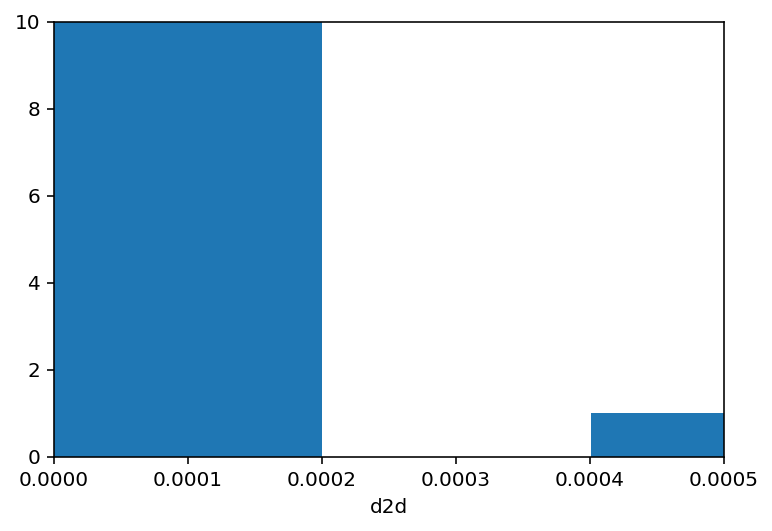

In [29]:
plt.hist(d2dr, bins=30000)
plt.xlabel('d2d')
plt.xlim(0,0.0005)
plt.ylim(0,10)

In [132]:
print len(np.unique(idwr))
print len(np.unique(idrw))
print len(idrw[d2dr<0.0003*u.deg])
print len(idwr[d2dw<0.0003*u.deg])

24430
22256
5276
7812


validation plots

histogram of distances (angular, 3d)

number of matches as a function of distlim: for distlim from 1Mpc to 100Mpc

z vs z

mass proxy vs mass proxy, any outliers?

how to make a match similar to topcat? with a certain 2d+1d separation (1Mpc, dz=0.1)



In [144]:
# Função distlim
lista_i = []
lista_r = []
for i in range(0,100000,1000):
    idxc_w, idxc_r, d2d, d3d = c_r.search_around_3d(c_w, i*u.kpc)
    lista_i.append(len(idxc_w))
    lista_r.append(i)

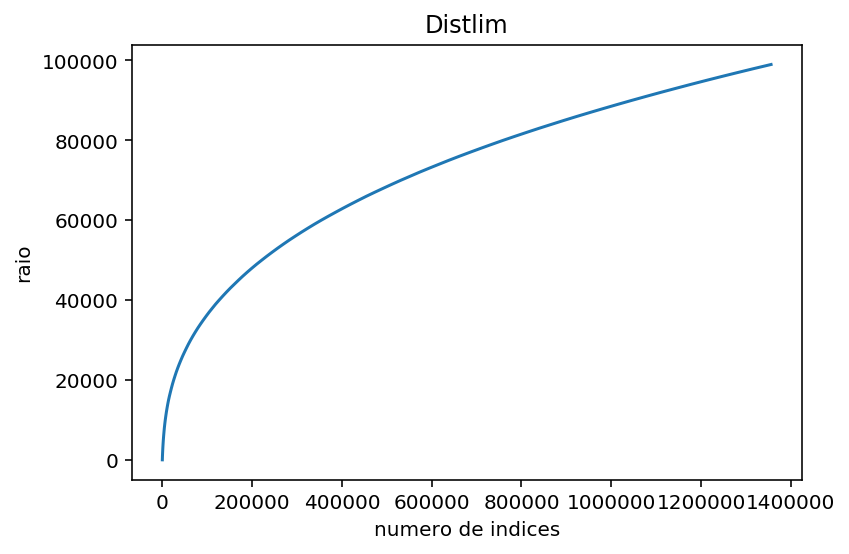

In [145]:
# Plot da função distlim
fig = plt.figure(1)
ax = fig.add_subplot(111)
plt. plot(lista_i,lista_r)
plt.xlabel('numero de indices')
plt.ylabel('raio')
plt.title('Distlim')

In [146]:
print 'Objects around to catalog 3d'
idxc_w, idxc_r, d2d, d3d = c_r.search_around_3d(c_w, 4000*u.kpc)
print 'Números de objetos do wen =',len(idxc_w)
print 'Números de objetos do rykoff =',len(idxc_r)

Objects around to catalog 3d
Números de objetos do wen = 1631
Números de objetos do rykoff = 1631


(array([  1.32000000e+03,   1.46000000e+02,   9.10000000e+01,
          3.90000000e+01,   1.90000000e+01,   5.00000000e+00,
          6.00000000e+00,   3.00000000e+00,   1.00000000e+00,
          1.00000000e+00]),
 array([  1.36877704e-07,   4.97548506e-02,   9.95095644e-02,
          1.49264278e-01,   1.99018992e-01,   2.48773706e-01,
          2.98528419e-01,   3.48283133e-01,   3.98037847e-01,
          4.47792561e-01,   4.97547274e-01]),
 <a list of 10 Patch objects>)

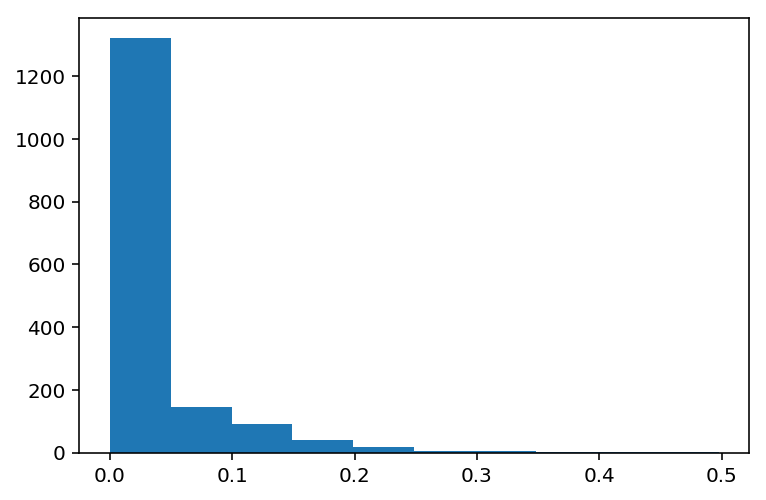

In [147]:
# Histograma de d2d
plt.hist(d2d)

(array([ 118.,  126.,  127.,  164.,  151.,  161.,  174.,  210.,  195.,  205.]),
 array([ 0.00889832,  0.40790262,  0.80690691,  1.2059112 ,  1.60491549,
         2.00391979,  2.40292408,  2.80192837,  3.20093267,  3.59993696,
         3.99894125]),
 <a list of 10 Patch objects>)

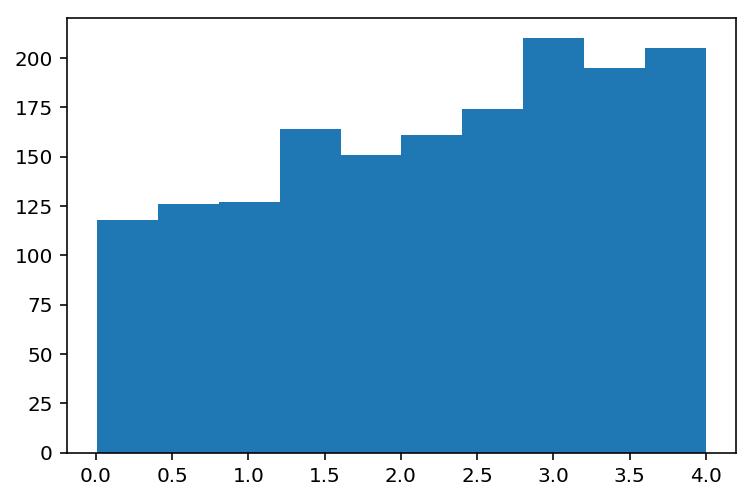

In [148]:
# Histograma 3d
plt.hist(d3d)

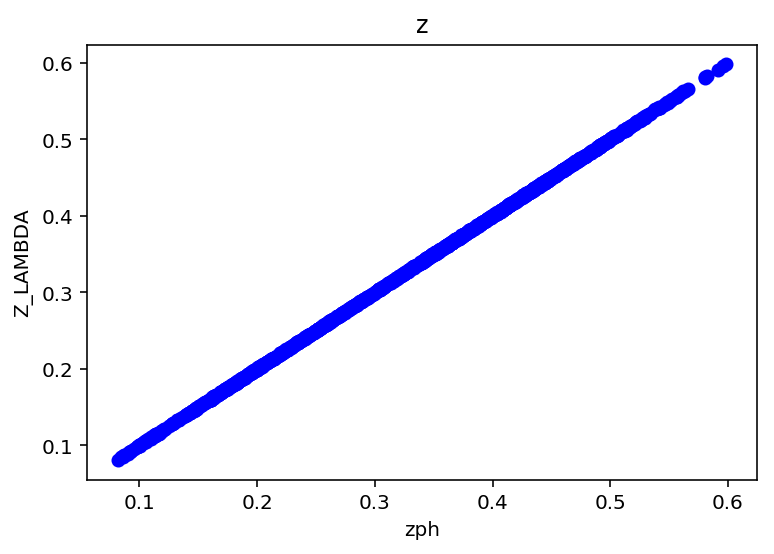

In [149]:
# Plot z vs z
iw = w[idxc_w]
ir = r[idxc_r]
zw = iw['zph']
zr = ir['z_lambda']
fig = plt.figure(1)
ax = fig.add_subplot(111)
plt. plot(zw,zr, 'bo')
plt.xlabel('zph')
plt.ylabel('Z_LAMBDA')
plt.title('z')

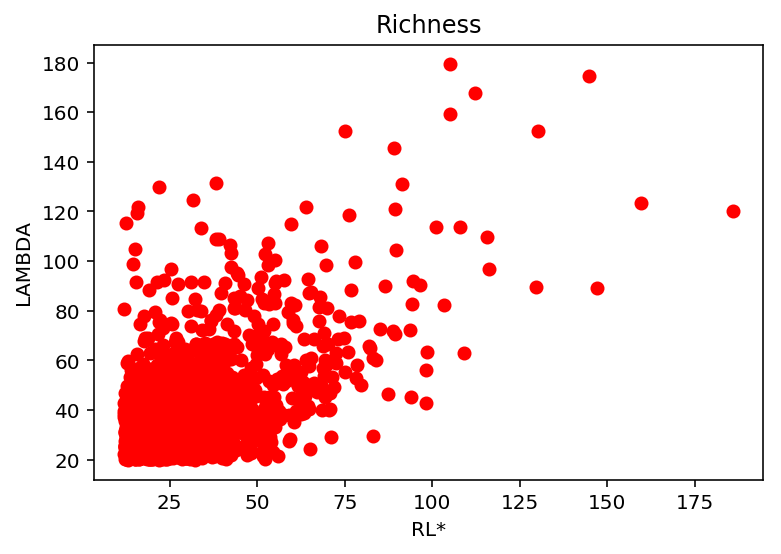

In [150]:
# Plor rich vs rich
zw = iw['RL*']
zr = ir['LAMBDA']
fig = plt.figure(1)
ax = fig.add_subplot(111)
plt. plot(zw,zr, 'ro')
plt.xlabel('RL*')
plt.ylabel('LAMBDA')
plt.title('Richness')

(0, 10)

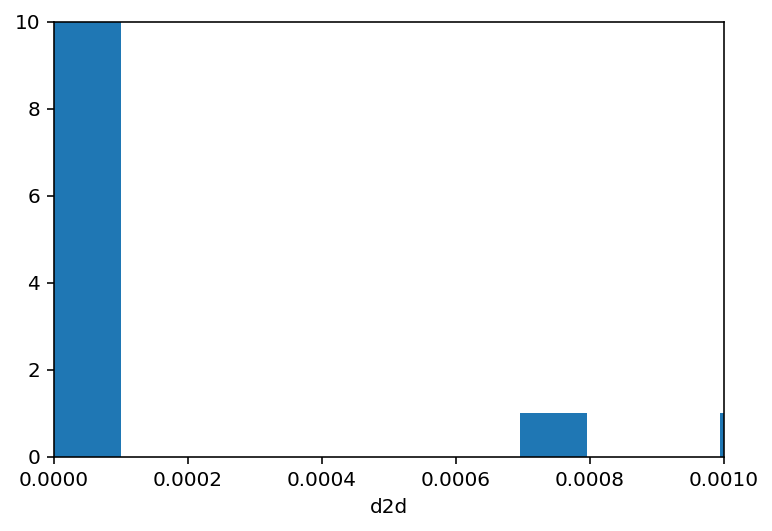

In [152]:
plt.hist(d2d, bins=5000)
plt.xlabel('d2d')
plt.xlim(0,0.001)
plt.ylim(0,10)

In [153]:
print len(np.unique(idxc_w))
print len(np.unique(idxc_r))
print len(idxc_w[d2d<0.0006*u.deg])
print len(idxc_r[d2d<0.0006*u.deg])

obje_wr = idxc_w[d2d<0.0006*u.deg]
obje_rw = idxc_r[d2d<0.0006*u.deg]

o_wr = w[obje_wr]
o_rw = r[obje_rw]

print len(o_wr)
print len(o_rw)

1626
1614
1066
1066
1066
1066


# Match do Wen com o Koester

In [34]:
print 'match to catalog 3d'
idwk, d2dw, d3d = c_w.match_to_catalog_3d(c_k) 
print 'Match Wen em relacao ao Redmapper =',len(idwk)
print idwk, d2dw, d3d 

print 'match to catalog 3d'
idkw, d2dk, d3d = c_k.match_to_catalog_3d(c_w) 
print 'Match Wen em relacao ao Redmapper =',len(idkw)
print idkw, d2dk, d3d

match to catalog 3d
Match Wen em relacao ao Redmapper = 132684
[7419 6667 7558 ..., 2448 7558 5206] [u'16d07m07.1878s' u'5d30m45.3252s' u'15d08m42.2407s' ..., u'1d51m03.441s'
 u'5d46m29.1791s' u'2d57m08.201s'] [ 148.67041547   90.07930269  968.68411243 ...,  120.69025126  518.87412629
  120.33543007] Mpc
match to catalog 3d
Match Wen em relacao ao Redmapper = 13823
[102825  40716  77649 ...,  29457  47116  73330] [u'2d06m09.0806s' u'0d00m00.1177s' u'0d22m16.9488s' ..., u'0d31m22.3697s'
 u'0d53m30.4223s' u'3d12m13.1059s'] [ 16.18249004   2.99766175   7.58859743 ...,  10.68611578  16.09161372
  31.08858291] Mpc


(0, 6)

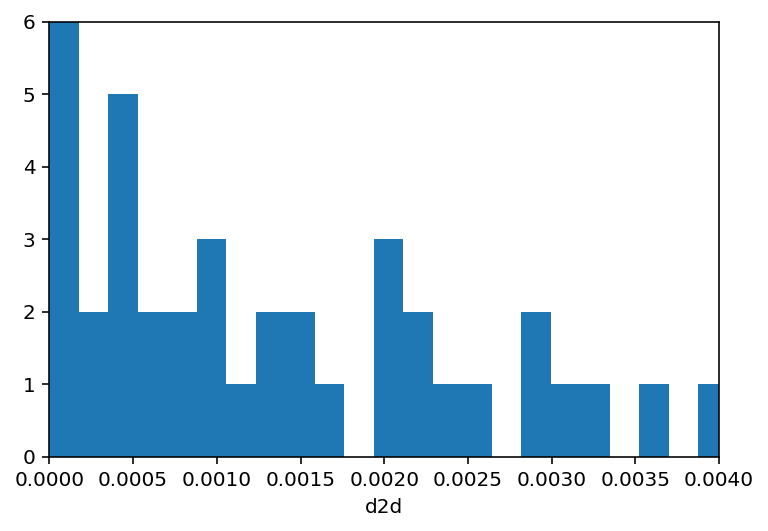

In [35]:
plt.hist(d2dk, bins=30000)
plt.xlabel('d2d')
plt.xlim(0,0.004)
plt.ylim(0,6)

In [36]:
print len(np.unique(idwk))
print len(np.unique(idkw))
print len(idwk[d2dw<0.0020*u.deg])
print len(idkw[d2dk<0.0020*u.deg])

11407
10106
2859
2220


In [37]:
print 'Objects around to catalog 3d'
idxc_w, idxc_k, d2d, d3d = c_k.search_around_3d(c_w, 1000*u.kpc)
print 'Números de objetos do wen =',len(idxc_w)
print 'Números de objetos do koester =',len(idxc_k)

Objects around to catalog 3d
Números de objetos do wen = 134
Números de objetos do koester = 134


(0, 10)

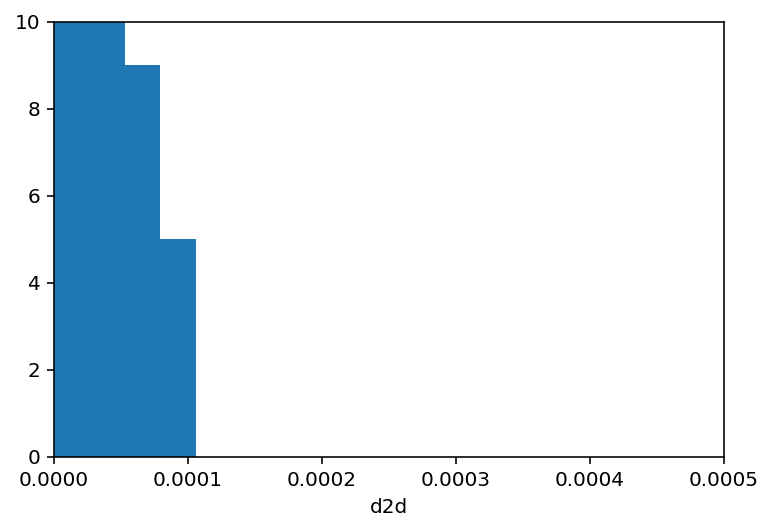

In [38]:
plt.hist(d2d, bins=3000)
plt.xlabel('d2d')
plt.xlim(0,0.0005)
plt.ylim(0,10)

In [39]:
print len(np.unique(idxc_w))
print len(np.unique(idxc_k))
print len(idxc_w[d2d<0.0002*u.deg])
print len(idxc_r[d2d<0.0002*u.deg])

obje_wk = idxc_w[d2d<0.0002*u.deg]
obje_kw = idxc_k[d2d<0.0002*u.deg]

o_wk = w[obje_wk]
o_kw = k[obje_kw]

print len(o_wk)
print len(o_kw)

134
134
120
120
120
120


/home/isabella/Downloads/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 290 but corresponding boolean dimension is 134


# Match do Koester com o Rykoff

In [40]:
print 'match to catalog 3d'
idkr, d2dk, d3d = c_k.match_to_catalog_3d(c_r) 
print 'Match Wen em relacao ao Redmapper =',len(idkr)
print idkr, d2dk, d3d 

print 'match to catalog 3d'
idrk, d2dr, d3d = c_r.match_to_catalog_3d(c_k) 
print 'Match Wen em relacao ao Redmapper =',len(idrk)
print idrk, d2dr, d3d 

match to catalog 3d
Match Wen em relacao ao Redmapper = 13823
[    0    18    12 ..., 11039  5641  3351] [u'0d00m00.0433s' u'0d06m05.5363s' u'0d00m00.2362s' ..., u'0d32m53.6089s'
 u'2d11m32.5287s' u'1d16m31.8612s'] [ 33.78239798   8.66886588   8.9358104  ...,  19.30755544  35.44308861
  17.92659839] Mpc
match to catalog 3d
Match Wen em relacao ao Redmapper = 26111
[    0  1209   173 ...,  9357 12208  9369] [u'0d00m00.0433s' u'0d00m00.186s' u'0d43m06.1583s' ..., u'2d36m05.4138s'
 u'2d55m54.3698s' u'0d16m24.9967s'] [  33.78239798    8.64209231   10.96266419 ...,  352.62514555  646.94940014
  662.10417112] Mpc


(0, 10)

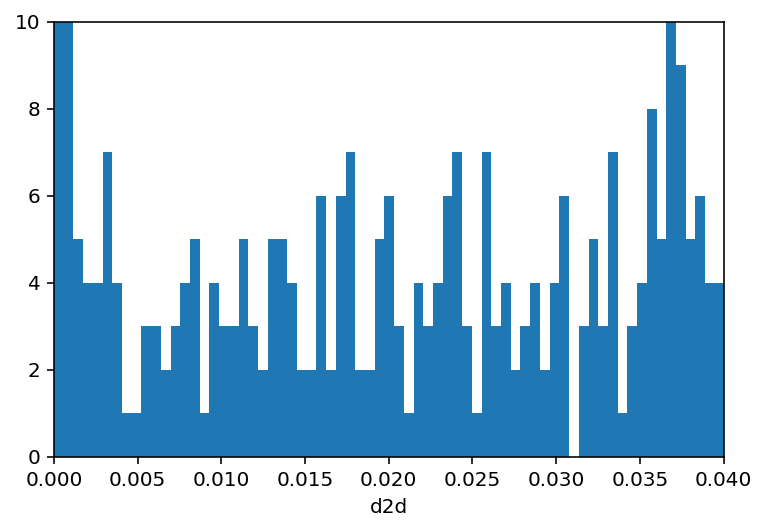

In [41]:
plt.hist(d2dk, bins=30000)
plt.xlabel('d2d')
plt.xlim(0,0.04)
plt.ylim(0,10)

In [42]:
print len(np.unique(idkr))
print len(np.unique(idrk))
print len(idrk[d2dr<0.035*u.deg])
print len(idkr[d2dk<0.035*u.deg])

4810
5031
1670
1927


In [43]:
print 'Objects around to catalog 3d'
idxc_r, idxc_k, d2d, d3d = c_k.search_around_3d(c_r, 1000*u.kpc) 
print 'Números de objetos do rykoff =',len(idxc_r)
print 'Números de objetos do koester =',len(idxc_k)

Objects around to catalog 3d
Números de objetos do rykoff = 66
Números de objetos do koester = 66


(0, 10)

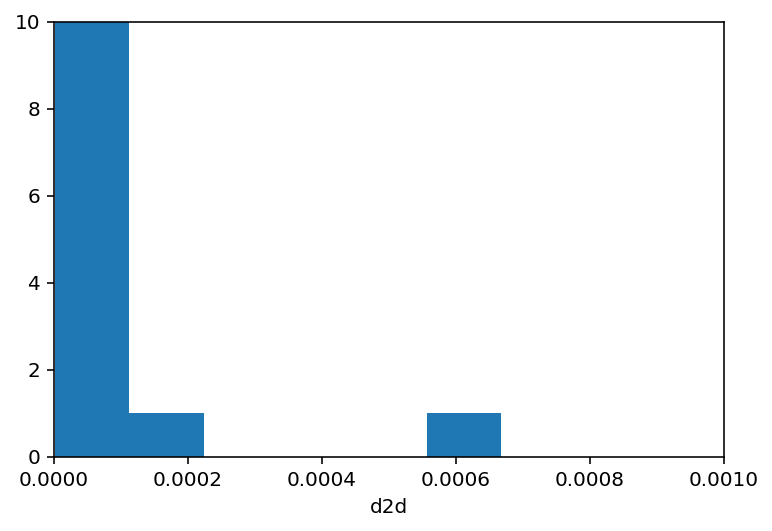

In [44]:
plt.hist(d2d, bins=1000)
plt.xlabel('d2d')
plt.xlim(0,0.001)
plt.ylim(0,10)

In [45]:
print len(np.unique(idxc_k))
print len(np.unique(idxc_r))
print len(idxc_k[d2d<0.0004*u.deg])
print len(idxc_r[d2d<0.0004*u.deg])

obje_kr = idxc_k[d2d<0.0004*u.deg]
obje_rk = idxc_r[d2d<0.0004*u.deg]

o_kr = k[obje_kr]
o_rk = r[obje_rk]

print len(o_kr)
print len(o_rk)

66
65
55
55
55
55


# Diagrama de Venn

In [46]:
# Resultado do match - Wen com o Rykoff
print o_wr
print o_rw

      WHL         RAJ2000  DEJ2000   zph   ... r200  RL*  N200    Other    
---------------- --------- -------- ------ ... ---- ----- ---- ------------
J000952.7+062442   2.46974  6.41159 0.2564 ... 1.14 23.55   27           --
J001341.8-064642     3.424 -6.77832 0.2742 ... 1.19 30.46   20           --
J001535.1+244756   3.89636 24.79879 0.2592 ... 0.87 15.51   18           --
J001724.8-071528    4.3533  -7.2578 0.2421 ... 1.16 30.32   15           --
J001753.9+182446   4.47472  18.4129 0.5415 ...  1.1 24.55   12           --
J001832.3-064460   4.63474 -6.74992 0.4068 ...  1.3 36.92   24           --
J002436.2+082131   6.15076  8.35853 0.2649 ... 0.79 13.57   17           --
J002639.1+063533   6.66302  6.59254 0.3476 ... 1.07 25.76   21           --
J003739.9+071109    9.4163  7.18594 0.1809 ... 1.09 24.45   25           --
J003918.0+004159   9.82501  0.69981 0.2696 ... 1.06 21.82   18 maxBCG,WHL09
             ...       ...      ...    ... ...  ...   ...  ...          ...
J232944.5+10

In [47]:
# Resultado do match - Wen com o Koester
print o_wk
print o_kw

      WHL         RAJ2000   DEJ2000  ...  RL*  N200         Other         
---------------- --------- --------- ... ----- ---- ----------------------
J000720.2+002933    1.8342   0.49257 ... 20.41   12                 maxBCG
J004638.6+010910   11.6608    1.1527 ... 13.69   12                 maxBCG
J011535.3+152856  18.89699   15.4821 ... 13.83    9                 maxBCG
J013325.9-102619   23.3578 -10.43853 ... 19.74   13                 maxBCG
J014642.6+131031  26.67746  13.17524 ... 12.83   10     maxBCG,WHL09,GMBCG
J014917.9+144016  27.32476  14.67121 ... 19.48   18 maxBCG,WHL09,GMBCG,AMF
J024713.4+004751   41.8057   0.79758 ... 12.26   11           maxBCG,WHL09
J072807.9+393057 112.03306  39.51577 ... 35.87   37 maxBCG,WHL09,GMBCG,AMF
J074616.9+220203 116.57034   22.0343 ... 27.07   30     maxBCG,WHL09,GMBCG
J075523.5+293931 118.84801  29.65855 ... 16.85   13     maxBCG,WHL09,GMBCG
             ...       ...       ... ...   ...  ...                    ...
J160441.3+563526 241.1721

In [48]:
# Resultado do match - Koester com o Rykoff
print o_kr
print o_rk

 RAJ2000   DEJ2000   zph    zsp   ...    LTr        LTi     Ngal NR200
   deg       deg                  ... 1e+10 Lsun 1e+10 Lsun           
--------- --------- ----- ------- ... ---------- ---------- ---- -----
142.01889  20.52921 0.208      -- ...      140.9      171.1   62    91
176.46580  -2.33627 0.122 0.12153 ...       67.7       85.2   43    61
321.29330  -6.96355 0.122      -- ...       89.6      111.5   41    51
170.62475  21.40603 0.159      -- ...       73.7       91.0   40    50
191.87751  59.19979 0.151 0.15172 ...       53.3       67.0   41    50
171.37889  68.05819 0.151 0.15596 ...       21.2       26.4   16    15
348.70690  14.12887 0.170 0.16644 ...       39.6       48.7   24    25
172.67204   6.01512 0.149 0.15089 ...       33.7       42.2   26    27
196.27421  62.21640 0.173 0.16947 ...       42.3       53.3   20    20
164.85314  51.50290 0.297 0.29072 ...       60.1       73.0   34    37
      ...       ...   ...     ... ...        ...        ...  ...   ...
235.60